<div class='title-page'>
    <p  class='ttlpage-heading'>Signals &amp; Systems Lab</p>
    <p class='ttlpage-heading'>ECE 351 - 51</p>
    <p class='ttlpage-instructor'>Phillip Hagen</p>
    <h1 class='ttlpage-title'>Lab #1</h1>
    <p class='rightalign'><em>Submitted by:</em></p>
    <p class='rightalign'>Mason Taylor</p>
    <p class='rightalign'>9/15/2019</p>
     
</div>

<div class="pg-header">
    <table>
        <tr>
            <td><p class="leftalign">Lab 2</p></td>
            <td><p class="rightalign">Mason Taylor</p></td>
        </tr>
    </table>
</div>

<h1>Introduction</h1>
<p>In this lab, we will be working with Python to model functions and plot those functions. We will first examine how to create functions that work with vector arguments in order to be able to plot the function over an entire range of time or space. Next, we will create functions implementing the unit step and ramp functions, and use those functions to replicate the graph of an arbitrary piecewise function.</p>

<h1>Procedure &amp; Results</h1>
<p>Below, the entire lab procedure is outlined. Each part is centered around acheiving something different.</p>
<h2>Part 1</h2>
<h3>Creating a user defined function for plotting and working with arrays.</h3>
<br>

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

halfsize_figure = (12,8)
fullsize_figure = (20,8)

#Default figure size is smaller figure

plt.figure(figsize=halfsize_figure)
plt.rcParams.update({'font.size': 16})

stepsize = 0.01

<Figure size 864x576 with 0 Axes>

<p>The following code is a user defined function that implements the cosine function for a vector argument. This function evaluates the value of cos at every value of the array <em>t</em> and returns an array <em>y</em> of the results.</p>

In [78]:
def func1(t):
    y = np.zeros((len(t), 1))
    for i in range(len(t)):
        y[i] = np.cos(t[i])
    return y

<p>Following code will graph the user defined function in the range of 0 to 10. Following the code is the output, the graph of the user-defined function with a (step-size of 0.01).</p>

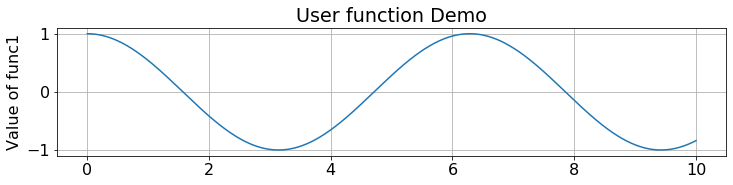

In [98]:
t = np.arange(0, 10 + stepsize, stepsize)
y = func1(t)

plt.figure(figsize=halfsize_figure)
plt.subplot(3,1,1)
plt.plot(t,y)
plt.grid(True)
plt.ylabel('Value of func1')
plt.title('User function Demo')

plt.show()

<div class="pg-e-spacer"></div>

<h2>Part 2</h2>
<p><b>Goal:</b> Create and utilize user defined functions to model a simple plot.</p>
<p>To model the following plot, we will need to use step and ramp functions. The plot we will model is:</p>
<img src="Lab2/function_plot.PNG" width="500px">
<p class='center'><b>Figure 1:</b> The function we will plot using custom u(t) and r(t) implementations.</p>
<br><br>
<p>The custom r(t) and u(t) functions code follows:</p>

In [80]:
def r(t):
    if t > 0:
        return t
    return 0

In [81]:
def u(t):
    if t >= 0:
        return 1
    return 0

<div class="pg-e-spacer"></div>

<div class="pg-b-spacer"></div>
<br>

In [82]:
def vector_plot(t, f):
    y = np.zeros((len(t),1))
    for i in range(len(t)):
        y[i] = f(t[i])
    return y

<p>With those functions modeled, we now plot them to ensure proper functionality:</p>

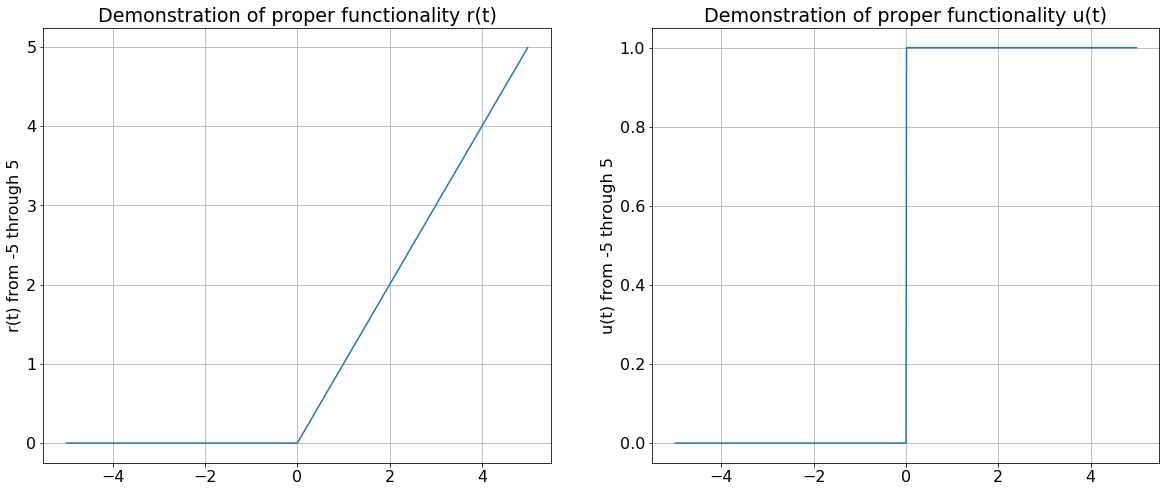

In [83]:
t = np.arange(-5, 5, stepsize)

y_r = vector_plot(t, r)
y_u = vector_plot(t, u)

plt.figure(figsize=fullsize_figure)

plt.subplot(1,2,1)
plt.plot(t,y_r)
plt.grid(True)
plt.ylabel('r(t) from -5 through 5')
plt.title('Demonstration of proper functionality r(t)')

plt.subplot(1,2,2)
plt.plot(t,y_u)
plt.grid(True)
plt.ylabel('u(t) from -5 through 5')
plt.title('Demonstration of proper functionality u(t)')


plt.show()

HTML("<p class='center'><b>Figure 2:</b> The plots of the custom implementations of r(t) and u(t)</p>")

<p>Next, we need to derive a function to match the plot from Figure 1, using only r(t) and u(t) with various time shifts and scaling applied. The derived function is:</p>

$f(t) = r(t) - r(t-3) + 5u(t-3) - 2u(t-6) - 2r(t-6)$

<p>The python function to model this derived function is implemented as follows:</p>

In [84]:
def f(t_in):
    y = np.zeros((len(t_in),1))
    t = 0
    for i in range(len(t_in)):  
        t = t_in[i]
        y[i] = r(t) - r(t-3) + 5*u(t-3) - 2*u(t-6) - 2*r(t-6)
    return y

<div class="pg-e-spacer"></div><br><br>

<p>This function yields the following plot:</p>

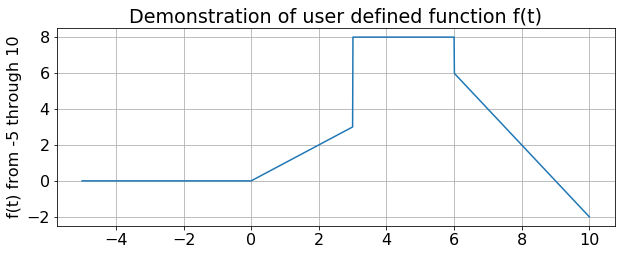

In [85]:
t = np.arange(-5, 10 + stepsize, stepsize)
y = f(t)
myFigSize = (10,8)
plt.figure(figsize=myFigSize)
plt.subplot(2,1,1)
plt.plot(t,y)
plt.grid(True)
plt.ylabel('f(t) from -5 through 10')
plt.title('Demonstration of user defined function f(t)')

plt.show()

HTML("<p class='center'><b>Figure 3:</b> The plot of the custom function f(t)</p>")

<div class="pg-e-spacer"></div>
<div class="pg-e-spacer"></div>
<div class="pg-e-spacer"></div>
<div class="pg-e-spacer"></div>

<h2>Part 3</h2>
<h3><b>Goal:</b> With the function for modeling the general plot completed in part 2, we now examine time shifting and derivatives with the new function.</h3>

<p>First, we apply time reversals and time shifts to the custom function.</p>

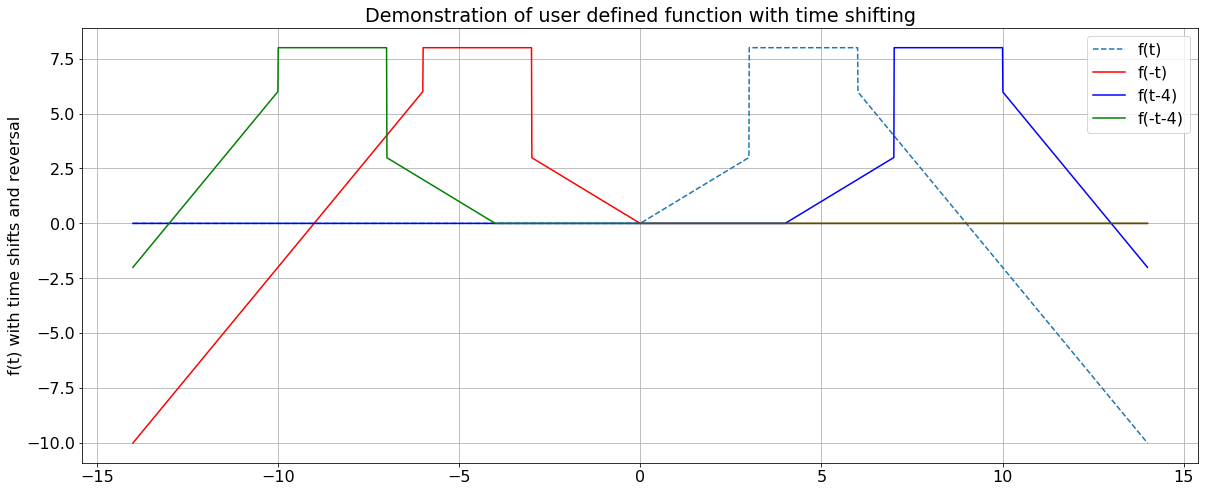

In [86]:
t = np.arange(-14, 14 + stepsize, stepsize)
y_0 = f(t)
y_1 = f(-t)
y_2 = f(t-4)
y_3 = f(-t-4)

plt.figure(figsize=fullsize_figure)
plt.plot(t,y_0, '--')
plt.plot(t,y_1, 'r')
plt.plot(t,y_2, 'b')
plt.plot(t,y_3, 'g')
plt.legend(['f(t)', 'f(-t)', 'f(t-4)', 'f(-t-4)'])
plt.grid(True)
plt.ylabel('f(t) with time shifts and reversal')
plt.title('Demonstration of user defined function with time shifting')



plt.show()

HTML("<p class='center'><b>Figure 4:</b> The plots of the custom function f(t) along with various time shifts.</p>")

<p>We now apply time scaling operations (with factors 1/2 and 2) to the custom function. The results are plotted below:</p>

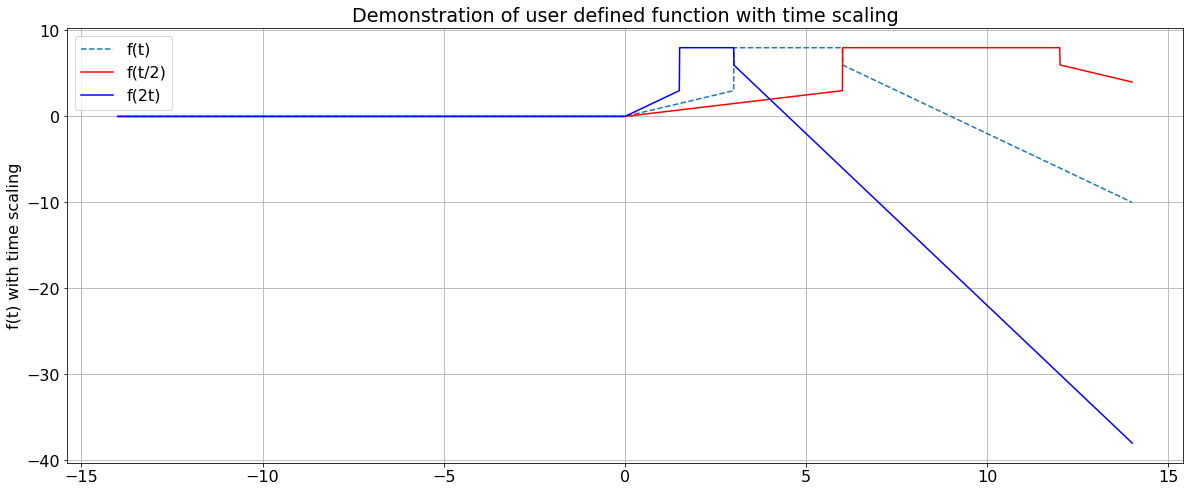

In [87]:
t = np.arange(-14, 14 + stepsize, stepsize)
y_0 = f(t)
y_1 = f(t/2)
y_2 = f(2*t)

plt.figure(figsize=fullsize_figure)
plt.plot(t,y_0, '--')
plt.plot(t,y_1, 'r')
plt.plot(t,y_2, 'b')
plt.legend(['f(t)', 'f(t/2)', 'f(2t)'])
plt.grid(True)
plt.ylabel('f(t) with time scaling')
plt.title('Demonstration of user defined function with time scaling')



plt.show()
HTML("<p class='center'><b>Figure 5:</b> The plots of f(t) along with time scalings of 1/2 and 2.</p>")

<p>For the final task, we will sketch the derivative of the function, and then plot the derivative versus the function using the numpy function diff.</p>
<p>Below is the expected derivative plot by examination of the funtion (remember that the derivative is simply the slope of the function at any point. Notice the spikes at 3 and 6.</p>
<img src='Lab2/Derivative.png' width='500px'/>
<p class='center'><b>Figure 6:</b> Manual plot of the derivative of f(t).</p>

<p>Below is the plot of the derivative using the numpy.diff function</p>

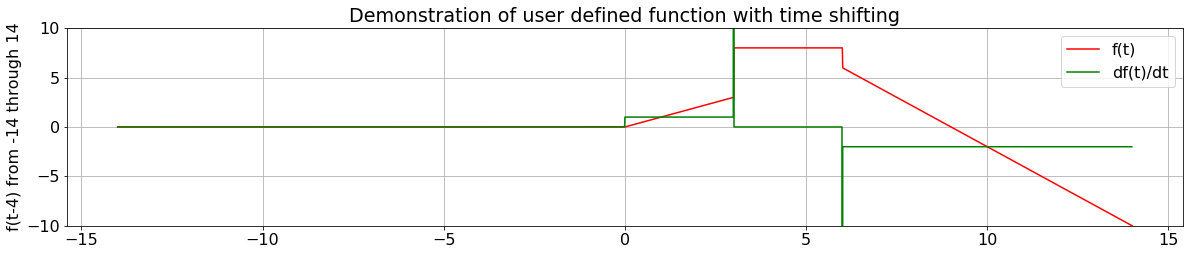

In [88]:
t = np.arange(-14, 10 + stepsize + 4, stepsize)

plt.figure(figsize=fullsize_figure)

y = f(t)
dt = np.diff(t)
dy = np.diff(y, axis = 0) / dt

plt.subplot(2,1,1)

plt.plot(t,y, 'r')
plt.plot(t[range(len(dy))],dy[:,0], 'g')

plt.legend(['f(t)', 'df(t)/dt'])

plt.grid(True)
plt.ylim([-10,10])
plt.ylabel('f(t-4) from -14 through 14')
plt.title('Demonstration of user defined function with time shifting')
plt.show()

HTML("<p class='center'><b>Figure 7:</b> Plot of df(t)/dt using numpy.diff function.</p>")

<h1>Issues &amp; Errors</h1>
<p>I have not any significant issues in this lab, only minor debugging issues (which is always expected) and trying to figure out the best way to use Jupyter notebook.</p>
<h1>Questions</h1>
<ol>
    <li><b>Are the plots from Part 3 Tasks 4 and 5 identical? Is it possible for them to match? Explain why or why not.</b>
    <br><br>While they are very similar, they are not identical. The reason for this is the manual plot is (assumed to be) exact neglecting the physical limitations, whereas, the computer plot using the diff function is limited by the step size.<br><br></li>
    <li><b>How does the correlation between the two plots (from Part 3 Tasks 4 and 5) change if you  were to change the step size within the time variable in Task 5? Explain why this happens.</b>
     <br><br>The smaller the step size is, the more accurate the computer plot is. But since the diff function is actually taking the difference at discrete points, the plot will never be exact. Thus, the impulses (at 3 and 6) are not actually to infinity in the plot, but they are to a large number. At some very small step value, the computer plot is indistinguishable from the true plot.<br><br></li>
    <li><b>In what way can the expectations and tasks be more clearly explained for this lab?</b>
    <br><br>I felt the expectations and tasks were clear and easy to follow in their current state. I had no trouble understanding and implementing the steps.<br><br></li>
</ol>

<h1>Conclusion</h1>
<p>In this lab, we have examined the creation of custom functions in python, vector valued inputs to functions, and modeling and plotting general functions all using python. This lab introduces and reinforces various concepts that will be reuired later on in the semester when we will use python more extensively to model various signal function and to simulate systems.</p>

In [100]:
# @hidden_cell
(HTML("""<style>
h1 {
    font-family: sans-serif;
    font-variant: small-caps;
    border-bottom: 1px solid black;
}
h2 {
    font-size: 1.2em !important;
    font-style: italic;
    margin-left: 1em !important;
}
h3 {
    font-size: 1.1em !important;
    font-weight: normal !important;
    /*margin: 0.4em !important;*/
    margin-left: 1em !important;
}
p {
    margin-left: 1em;
}
.ttlpage-title {
    text-align: center;
    border: 2px solid black;
    border-left: none;
    border-right: none;
    padding: 1em;
    margin-bottom: 3em !important;
}
.ttlpage-heading {
    font-size: 2em;
    font-family: serif;
    text-align: center !important;
    width: 100%;
}
.ttlpage-instructor {
    font-size: 1em;
    font-family: serif;
    text-align: center !important;
    width: 100%;
}
.title-page {
    padding-top: 8em;
    height: 90vh;
}
.pg-header {
    border-bottom: 2px solid black;
    page-break-before: always;
    
}
.pg-footer {
    page-break-after: always;
}
.pg-header table {
    width: 100%;
}
.rightalign {
    text-align: right !important;
}
.leftalign {
    text-align: left !important;
}
.center {
    width: 100%;
    text-align: center !important;
}
.section-header {
    font-family: sans-serif;
    font-variant: small-caps;
    border-bottom: 1px solid black;
}
@media only print {
    .pg-header {
        position: fixed;
        top: 0;
        left: 0;
        right: 0;
    }
    .pg-footer {
        page-break-after: always;
        bottom: 0;
        position: absolute;
        left: 0;
        right: 0;
    }
    .code_cell .inner_cell {
        margin-left: 1em !important;
    }
    div.prompt {
        display: none;
    }
    div.lab-text {
        margin-left: 0em;
    }
    .no-header {
        width: 110%;
        min-height: 6em;
        position: absolute;
        left: 0;
        top: 0;
        right: 0;
        z-index: 100000;
        margin-top: -2em;
        margin-left: -0.5em;
        background: white !important;
    }
    .pg-e-spacer {
        min-height: 1em;
        page-break-before: avoid;
        page-break-after: always;
        
    }
    .pg-b-spacer {
        min-height: 4em;
        page-break-before: always;
    }
    
}
@page {
   @bottom-right {
    content: counter(page) " of " counter(pages);
   }
}


</style>"""))
